In [1]:
# import useful libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import helper functions

In [2]:
data_folder = 'data'


def get_dataframes():
    train_X = pd.read_csv('../' + data_folder + '/' + 'train_X.csv')
    train_Y = pd.read_csv('../' + data_folder + '/' + 'train_y.csv')
    test_X = pd.read_csv('../' + data_folder + '/' + 'test_X.csv')
    test_Y = pd.read_csv('../' + data_folder + '/' + 'test_y.csv')
    return train_X, train_Y, test_X, test_Y


# import the test and train dataframes
train_X, train_Y, test_X, test_Y = get_dataframes()

train_X.info()

# # take just first 10000 rows for training
# train_X = train_X[:10000]
# train_Y = train_Y[:10000]

# # take just first 1000 rows for testing
# test_X = test_X[:2000]
# test_Y = test_Y[:2000]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140398 entries, 0 to 140397
Data columns (total 40 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   heartrate         140398 non-null  float64
 1   handTemperature   140398 non-null  float64
 2   handAcc16_1       140398 non-null  float64
 3   handAcc16_2       140398 non-null  float64
 4   handAcc16_3       140398 non-null  float64
 5   handAcc6_1        140398 non-null  float64
 6   handAcc6_2        140398 non-null  float64
 7   handAcc6_3        140398 non-null  float64
 8   handGyro1         140398 non-null  float64
 9   handGyro2         140398 non-null  float64
 10  handGyro3         140398 non-null  float64
 11  handMagne1        140398 non-null  float64
 12  handMagne2        140398 non-null  float64
 13  handMagne3        140398 non-null  float64
 14  chestTemperature  140398 non-null  float64
 15  chestAcc16_1      140398 non-null  float64
 16  chestAcc16_2      14

In [3]:
# import the required libraries

# for specific c values
validation_k = 5
validation_scores = []
c_values = [0.001, 0.01, 0.1, 1.0, 10]
accuracies = []


def logistic_regression(is_validation=False, is_test=False):
    best_accuracy = 0
    best_weights = []
    best_c = 0
    for c in c_values:
        log_reg = LogisticRegression(solver='sag',
                                     multi_class='multinomial',
                                     max_iter=5000, random_state=42, C=c)
        if is_validation:
            scores = cross_val_score(log_reg, train_X, train_Y, cv=5)
            print('Accuracy for C = ', c, ' is ', scores.mean(
            ), 'with standard deviation of ', scores.std(), 'and variance of ', scores.var())
            validation_scores.append(scores.mean())

        if is_test:
            log_reg.fit(train_X, train_Y)
            y_pred = log_reg.predict(test_X)
            print(y_pred.shape)
            acc = accuracy_score(test_Y, y_pred)
            print('Accuracy for C = ', c, ' is ', acc)
            accuracies.append(acc)
            if acc > best_accuracy:
                best_accuracy = acc
                best_c = c
                best_weights = log_reg.coef_

    return best_accuracy, best_weights, best_c


# store the best weights in a csv file in the models folder
best_accuracy, best_weights, best_c = logistic_regression(is_test=True)
np.savetxt('../models/best_weights_logistic.csv', best_weights, delimiter=',')
print('Best C value: ', best_c)
print('Best accuracy: ', best_accuracy)


(35100,)
Accuracy for C =  0.001  is  0.7925925925925926
(35100,)
Accuracy for C =  0.01  is  0.8014814814814815


KeyboardInterrupt: 

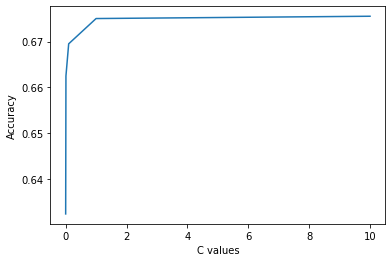

In [ ]:
# plot the accuracies
plt.plot(c_values, accuracies)
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.show()



Accuracy for C =  0.001  is  0.6050000000000001 with standard deviation of  0.009797958971132722 and variance of  9.600000000000019e-05
Accuracy for C =  0.01  is  0.6405999999999998 with standard deviation of  0.011213384859176142 and variance of  0.00012574000000000073
Accuracy for C =  0.1  is  0.6535 with standard deviation of  0.01101816681667145 and variance of  0.00012139999999999989
Accuracy for C =  1.0  is  0.6552 with standard deviation of  0.011630133275246706 and variance of  0.00013526000000000068
Accuracy for C =  10  is  0.6548 with standard deviation of  0.012698818842711327 and variance of  0.00016126000000000026


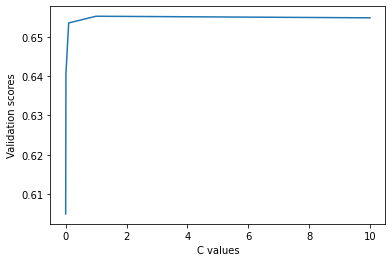

In [ ]:
# plotting the validation scores

logistic_regression(is_validation=True)
plt.plot(c_values, validation_scores)
plt.xlabel('C values')
plt.ylabel('Validation scores')
plt.show()
